To use PCA Algorithm for dimensionality reduction. You have a dataset that includes
measurements for different variables on wine (alcohol, ash, magnesium, and so on). Apply
PCA algorithm & transform this data so that most variations in the measurements of the
variables are captured by a small number of principal components so that it is easier to
distinguish between red and white wine by inspecting these principal components.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#loading dataset
df = pd.read_csv("Wine.csv")

In [3]:
X = df.iloc[: , 1:] #features
Y = df.iloc[: , 0] #labels

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

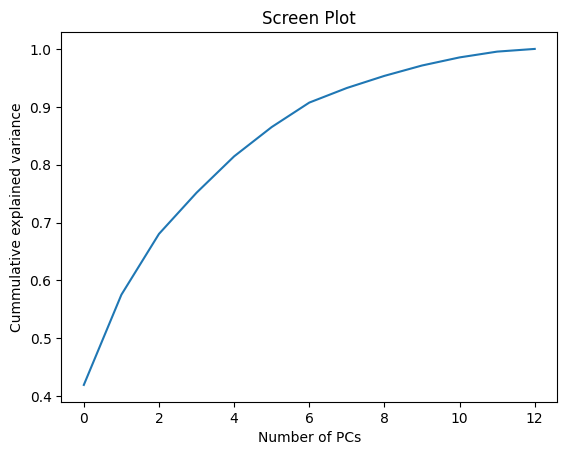

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_std)      # finding PC
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel("Number of PCs")
plt.ylabel("Cummulative explained variance")
plt.title("Screen Plot")
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_std)

#centers=pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


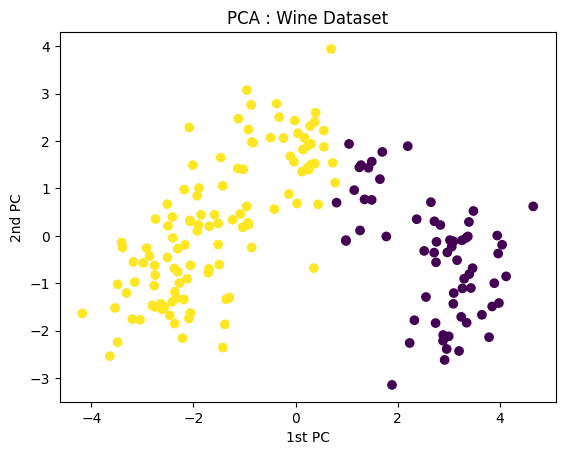

In [7]:
pca = PCA(n_components=2)
reduced_x = pd.DataFrame(data = pca.fit_transform(X_std),columns = ['PCA1','PCA2'])

plt.scatter(reduced_x['PCA1'],reduced_x['PCA2'],c=kmeans.labels_)
#plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("PCA : Wine Dataset")
plt.show()